#                               Machine Learning on Avocado Dataset
<img src="https://i0.wp.com/thecostaricanews.com/wp-content/uploads/2019/02/Hass-Avocados-e1550179886174.jpg?resize=1068%2C626&ssl=1" align='center'><br/>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Load Avocado data from CSV to Python Dataframe](#section3)<br>
  - 3.1 [Description of the Dataset](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
  - 3.3 [Observations from Preprofiling](#section303)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
    - 4.1.1 [Dropping irrelevant fields](#section40101)<br>
    - 4.1.2 [Changing data type from Object to DateTime](#section40102)<br>
    - 4.1.3 [Splitting Day, Month & Year from Date into different features](#section40103)<br>
    - 4.1.4 [Renaming Column Names](#section40104)<br>	
  - 4.2 [Data Postprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [Univariate Analysis](#section501)<br>
     - 5.1.1 [% Distribution of Avocado Types](#section50101)<br>
	 - 5.1.2 [Region wise Count](#section50102)<br> 
     - 5.1.3 [Distribution of Average Price](#section50103)<br> 
  - 5.2 [Bivariate Analysis](#section502)<br>
     - 5.2.0 [Analysis of AveragePrice Vs Region](#section50200)<br>
     - 5.2.1 [Analysis of AveragePrice Vs Year](#section50201)<br>
     - 5.2.2 [Analysis of Type of Bags Sold based on Region](#section50202)<br>
     - 5.2.3 [Plotting AveragePrice by Date](#section50203)<br>
     - 5.2.4 [Plotting AveragePrice Vs Type](#section50204)<br>
	 - 5.2.5 [Plotting TotalVolume Vs Region](#section50205)<br>
	 - 5.2.6 [Plotting Total Bags Vs Region](#section50206)<br>
  - 5.3 [MultiVariate Analysis](#section503)<br>
     - 5.3.1 [Analysis of Total Volume & Average Price against Year](#section50301)<br>
     - 5.3.2 [Analysis of Types of Bags, Total Bags, Total Volume & Year](#section50302)<br>
     - 5.3.3 [Analysis of Avocado Varieties against Months](#section50303)<br>
	 - 5.3.4 [Analysis of Avocado Varieties against Region](#section50304)<br>
	 - 5.3.5 [Analysis of Avocado Varieties against AveragePrice](#section50305)<br>
	 - 5.3.6 [Analysis of Avocado Varieties against Type](#section50306)<br>
     - 5.3.7 [Analysis of Total Volume Vs AveragePrice based on Year](#section50307)<br>
     - 5.3.8 [Analysis of AveragePrice, Month & Year](#section50308)<br>
	 - 5.3.9 [Analysis of AveragePrice, Month & Type](#section50309)<br>
  - 5.4 [Preprocessing for ML modelling](#section504)<br>
	- 5.4.1 [Dropping Region & Date columns from Dataframe which aren't relevant for our Model Analysis](#section50401)<br>
	- 5.4.2 [Categorical Encoding based on Avocado Type](#section50402)<br>
  - 5.5 [Correlation between numerical variables](#section505)<br>
6. [Machine Learning Modelling](#section6)<br>
 - 6.1 [Regression Machine Learning Models](#section601)<br>
     - 6.1.1 [Linear Regression Model](#section60101)<br>
         - 6.1.1.1 [Plot between Test data & Predicted Data for Linear Regression model](#section6010101)<br>
     - 6.1.2 [Decision Tree Regression Model](#section60102)<br>
         - 6.1.2.1 [Plot between Test data & Predicted Data for Decision Tree Regression model](#section6010201)<br>
     - 6.1.3 [Random Forest Regression Model](#section60103)<br>
         - 6.1.3.1 [Plot between Test data & Predicted Data for Random Forest Regression model](#section6010301)<br>  
     - 6.1.4 [KNN Regression Model](#section60104)<br>
         - 6.1.4.1 [Plot between Test data & Predicted Data for KNN Regression model](#section6010401)<br>
 - 6.2 [Plot Comparing Test & ML Model Prediction values](#section602)<br>
 - 6.3 [Plot Comparing ML Model Errors](#section603)<br>
 - 6.4 [Plot Comparing Test Values with ML Model Predictions](#section604)<br> 
 - 6.5 [Model Evaluation Metrics](#section605)<br>
     - 6.5.1 [Mean Absolute Error value across Algorithms](#section60501)<br>
     - 6.5.2 [Mean Square Error value across Algorithms](#section60502)<br>
     - 6.5.3 [Root Mean Square Error value across Algorithms](#section60503)<br>
     - 6.5.4 [Mean Absolute Percentage Error value across Algorithms](#section60504)<br>
		- 6.5.4.1 [Custom Function to Calculate Mean Absolute Percentage Error](#section6050401)<br>
     - 6.5.5 [R Square Error value across Algorithms](#section60505)<br> 
	 - 6.5.6 [Dataframe showing ML Models & Evaluation Metrics against those Models](#section60506)<br>
7. [Conclusion](#section7)<br>

<a id=section1></a>
##   Problem Statement

The goal is to build a model to predict Average Price of Avocados of different types.

<a id=section2></a>
## Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn import metrics

<a id=section3></a>
## Load Avocado data from CSV to Python Dataframe

In [3]:
df=pd.read_csv("avocado.csv")
df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


<a id=section301></a>
## Desciption of the Dataset

This dataset provides purchase analysis of various types of Avocados which are segmented based on their type (Conventional or Organic) & PLU (Price Look-Up) viz., 4046, 4225, 4770 across regions from 2015-2018.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Date  	                     | The date of the observation
| AveragePrice                   | The average price of a single avocado - target variable
| Total Volume                   | Total number of avocados sold
| 4046  	                     | Total number of avocados with PLU 4046 sold
| 4225      	                 | Total number of avocados with PLU 4225 sold
| 4770               	         | Total number of avocados with PLU 4770 sold
| Total Bags                     | Total number of Avocado Bags sold
| Small Bags                     | Total number of Small Bags sold
| Large Bags                     | Total number of Large Bags sold
| XLarge Bags                    | Total number of XLarge Bags sold
| Type   	                     | Conventional or Organic
| year	                         | The year
| Region	                     | The city or region of the observation

<a id=section302></a>
## Pandas Profiling before Data Preprocessing

In [ ]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

In [ ]:
import pandas_profiling

Here, we will perform Pandas Profiling before preprocessing our dataset, so we will name the output file as **Avocados_profiling_preprocessing_report.html**.

In [ ]:
# To output pandas profiling report to an external html file.
# Saving the output as Avocados_profiling_preprocessing_report.html

profile = df.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="Avocados_profiling_preprocessing_report.html")

<a id=section303></a>
## Observations from Pre-Profiling

#### Dataset Info:
* Number of variables: 14
* Number of observations: 18249
* Missing cells: 0 (0%)

#### Variables Types:
* Numeric: 10
* Categorical: 4
* Rejected: 0

#### . 4046 is highly correlated with Total Volume, 4225, Total Bags & Small Bags
#### . 4225 is highly correlated with Total Volume, 4046, Total Bags & Small Bags
#### . Total Volume is highly correlated with 4046, 4225, Total Bags & Small Bags
#### . Total Bags is highly correlated with Total Volume, 4046, 4225, Small Bags, Large Bags
#### . Small Bags is highly correlated with Total Volume, 4046, 4225, Total Bags, Large Bags
#### . 4046 has 242 (1.3%) zeros
#### . 4770 has 5497 (30.1%) zeros
#### . Large Bags has 2370 (13.0%) zeros
#### . XLarge Bags has 12048 (66.0%) zeros

<a id=section4></a>
## Data Preprocessing

<a id=section401></a>
### Data Preprocessing

<a id=section40101></a>
##### Dropping irrelevant fields

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<a id=section40102></a>
##### Changing data type from Object to DateTime

In [5]:
df['Date']=pd.to_datetime(df['Date'])

<a id=section40103></a>
##### Splitting Day, Month & Year from Date into different features

In [6]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

<a id=section40103></a>
##### Renaming Column Names

In [7]:
df.rename(columns={'Total Volume':'TotalVolume','Total Bags':'TotalBags','Small Bags':'SmallBags','Large Bags':'LargeBags','XLarge Bags':'XLargeBags'},inplace=True)

<a id=section5></a>
## Exploratory Data Analysis

## Analysis Based on Metrics

<a id=section501></a>
### Univariate Analysis

 <a id=section50101></a>
### % Distribution of Avocado Types

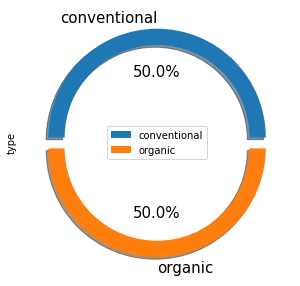

In [7]:
df['type'].value_counts().plot(kind='pie', explode=[0.05,0.05], fontsize=15, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, legend=True, 
                                               wedgeprops=dict(width=0.15))
plt.legend(loc='center')
plt.show()

> There are two types of Avocado which are equally distributed.

 <a id=section50102></a>
### Region wise Count

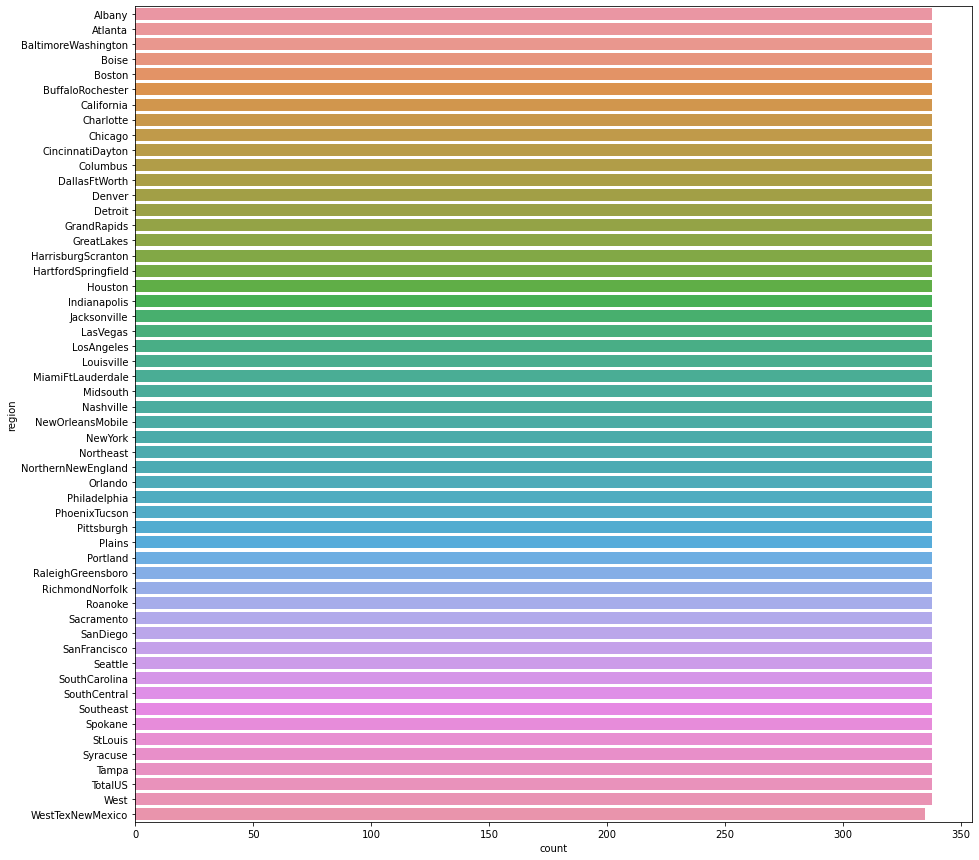

In [8]:
sns.countplot(y='region',data=df)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

 <a id=section50103></a>
### Distribution of Average Price

<AxesSubplot:xlabel='AveragePrice'>

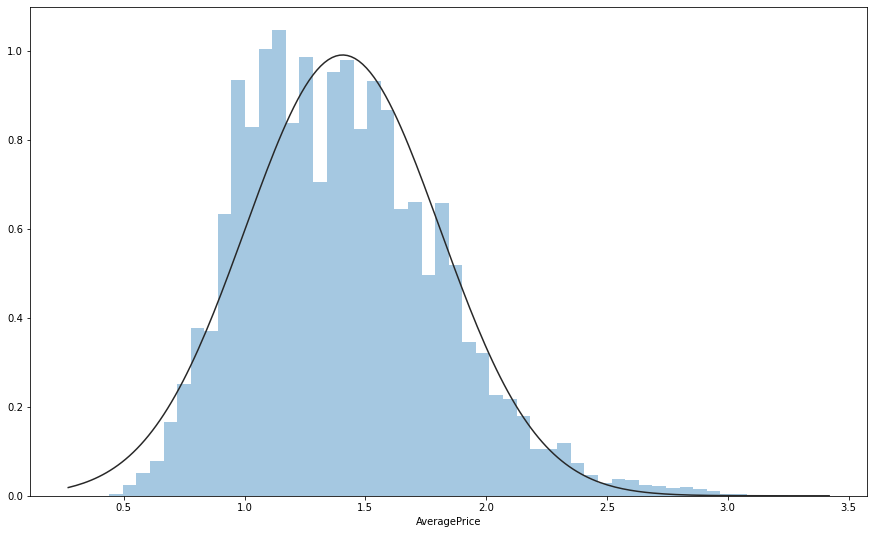

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

> AveragePrice of Avocados is Normally Distributed.

<a id=section502></a>
### Bivariate Analysis

<a id=section50200></a>
### Analysis of AveragePrice Vs Region

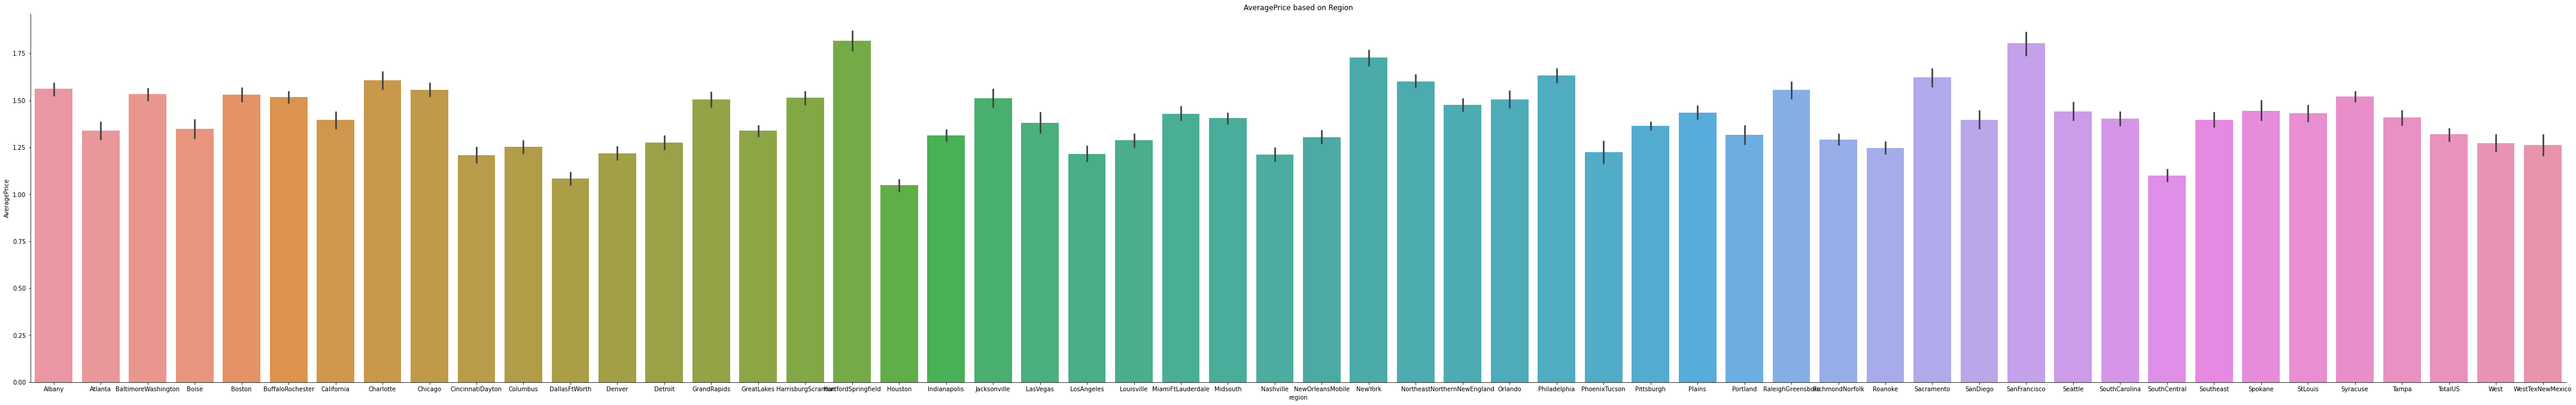

In [11]:
sns.catplot(x="region", y="AveragePrice", data=df,kind='bar')
plt.title("AveragePrice based on Region")
fig=plt.gcf()
fig.set_size_inches(85,10)

> AveragePrice is highest in Sanfrancisco and least in CincinnatiDayton.

<a id=section50201></a>
### Analysis of AveragePrice Vs Year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

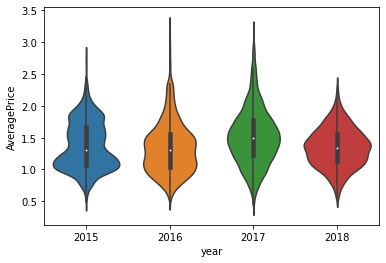

In [12]:
sns.violinplot(x="year", y="AveragePrice", data=df)

> Average Price is highest in 2016.

> Average Price is least in 2017.

> Average Price varied a lot in 2016 & 2017.

<a id=section50202></a>
### Analysis of Type of Bags Sold based on Region

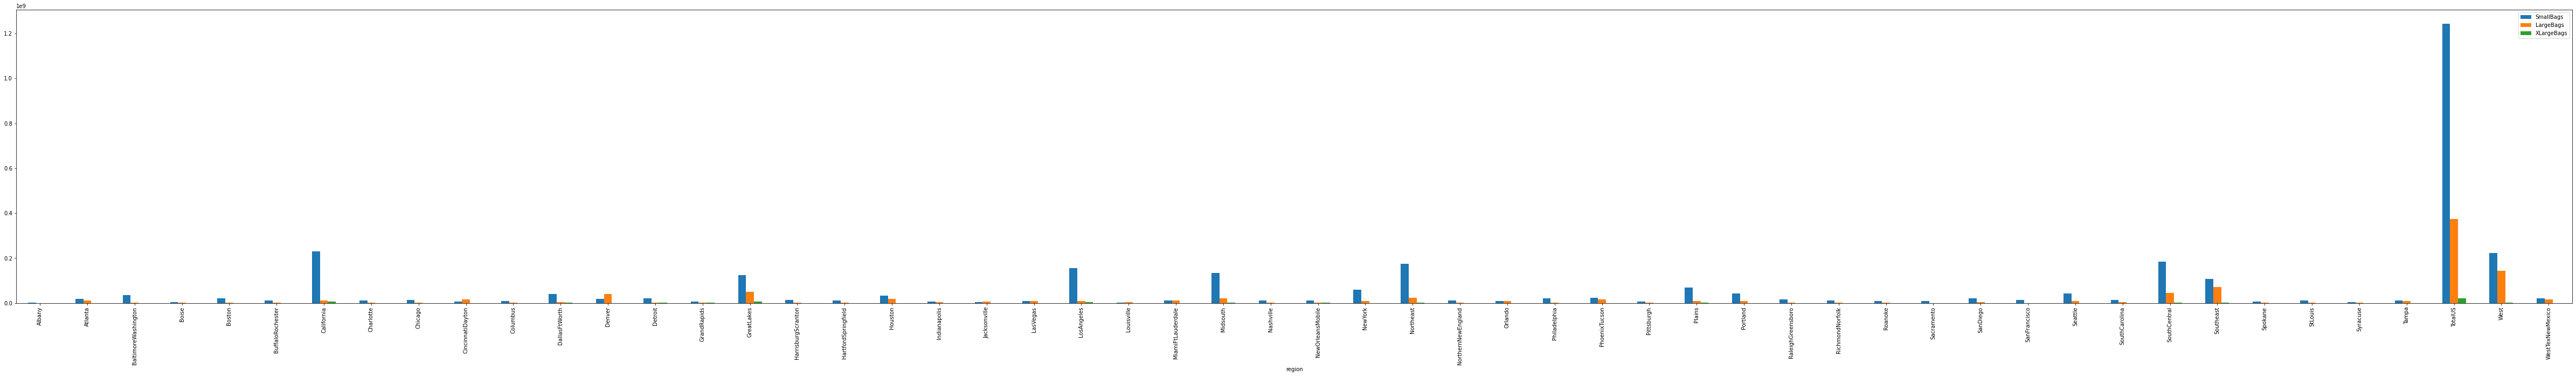

In [13]:
Bags = df[['SmallBags', 'LargeBags','XLargeBags']].groupby(df.region).sum()
Bags.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(85,10)

> Consumption of Small, Large & XLarge is highest in TotalUS region.

> Among the three types of Bags Small is largest consumed, followed by Large & XLarge.

> XLarge Bags aren't used in most of the regions.

> Large Bags are consumed in all regions except Albany.

> The Least consumption is in Albany.

<a id=section50203></a>
### Plotting AveragePrice by Date

Text(0.5, 1.0, 'Average Price')

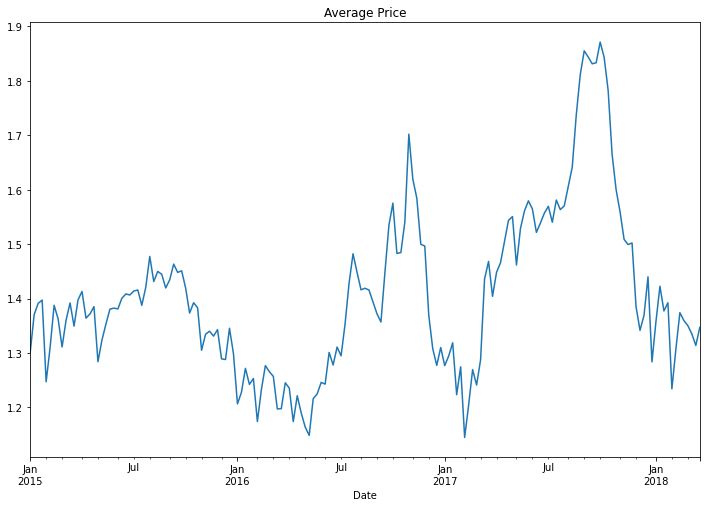

In [9]:
avgprice_dt=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
avgprice_dt['AveragePrice'].plot()
plt.title('Average Price')

> AveragePrice is highest in Oct'2017.

<a id=section50204></a>
### Plotting AveragePrice Vs Type

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

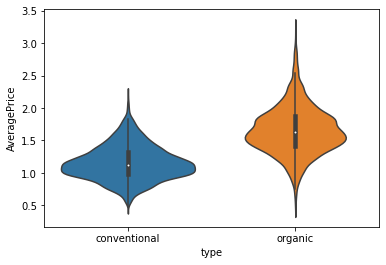

In [10]:
sns.violinplot(x="type", y="AveragePrice", data=df)

> Average Price of Organic Avocado's is higher than Conventional.

<a id=section50205></a>
### Plotting TotalVolume Vs Region

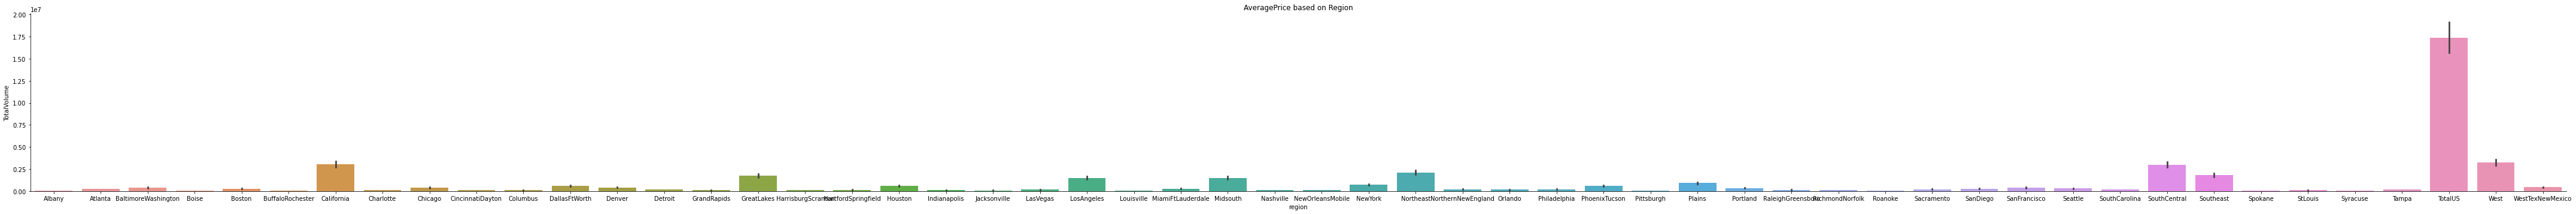

In [17]:
sns.catplot(x="region", y="TotalVolume", data=df,kind='bar')
plt.title("AveragePrice based on Region")
fig=plt.gcf()
fig.set_size_inches(85,5)

> Total Volume i.e., Avocado's are highly consumed in TotalUS, followed by West, California, SouthCentral & SouthEast.

<a id=section50206></a>
### Plotting Total Bags Vs Region

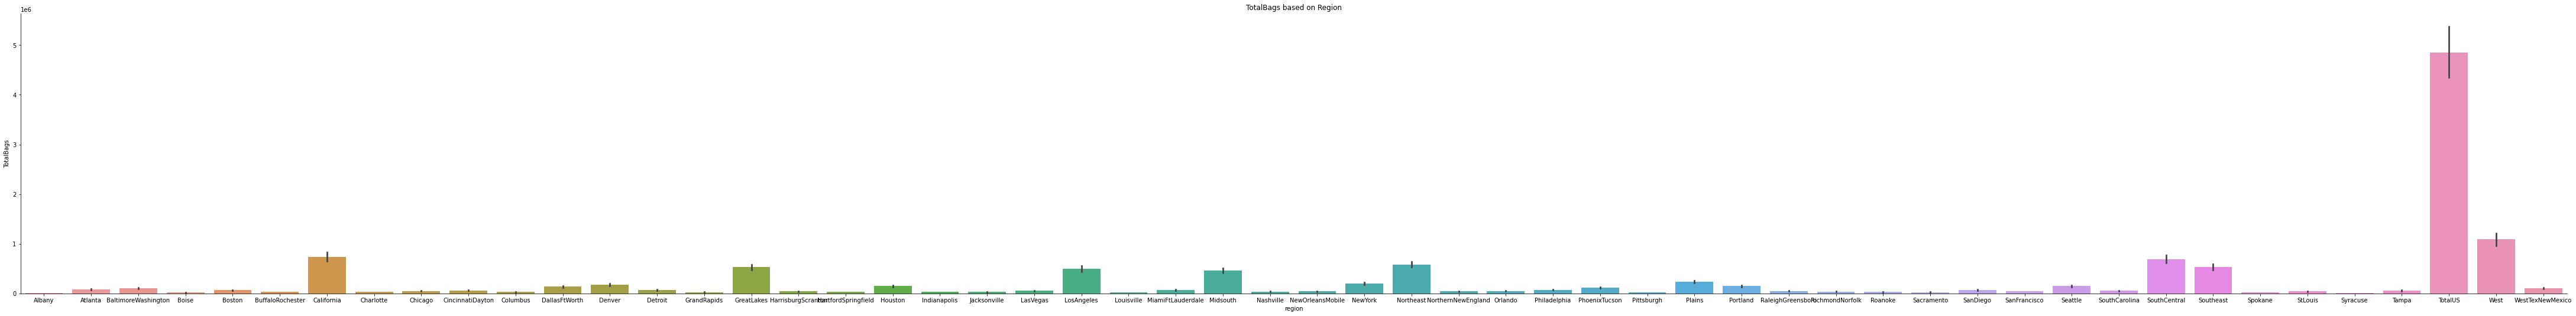

In [18]:
sns.catplot(x="region", y="TotalBags", data=df,kind='bar')
plt.title("TotalBags based on Region")
fig=plt.gcf()
fig.set_size_inches(85,8)

> Total Bags of Avocados consumed is highest in TotalUS.

<a id=section503></a>
### MultiVariate Analysis

<a id=section50301></a>
### Analysis of Total Volume against Year

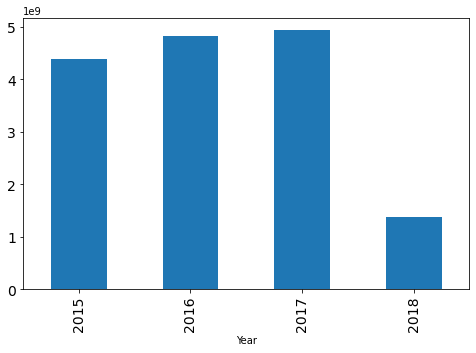

In [15]:
Year = df['TotalVolume' ].groupby(df.Year).sum()
Year.plot(kind='bar', fontsize = 14,figsize=(8,5))
plt.show()

> Consumption volume increased from 2015 to 2017 first half and then declined sharply in 2018.

<a id=section50302></a>
### Analysis of Types of Bags, Total Bags, Total Volume & Year

C:\Users\SanthoshBVSRK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


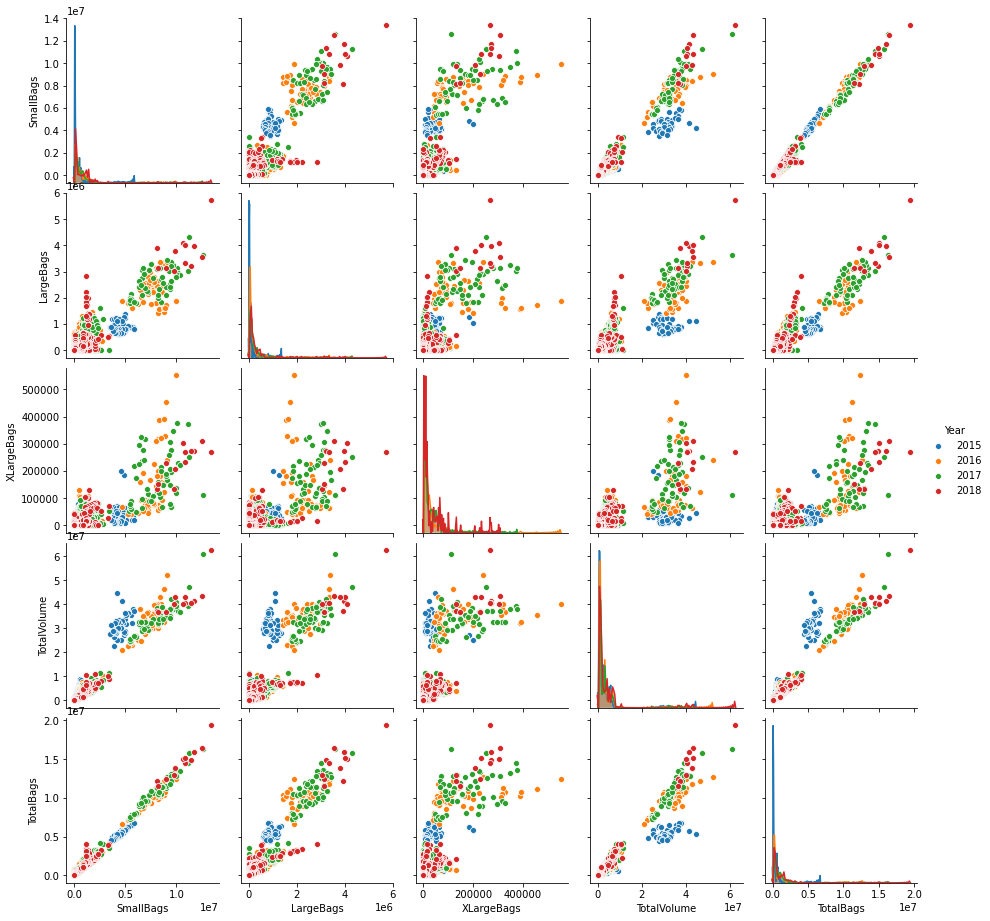

In [27]:
consumption = df[['SmallBags','LargeBags','XLargeBags','TotalVolume','TotalBags','Year']]
sns.pairplot(consumption, hue="Year")
plt.show()

> Ratio of Small Bags to Total Bags i.e., out of all the Bags consumed the SmallBags ratio is highest in 2018 followed by 2015.

> Total Bags used is highest in 2015 and least in 2018.

<a id=section50303></a>
### Analysis of Avocado Varieties against Months

<AxesSubplot:xlabel='Month'>

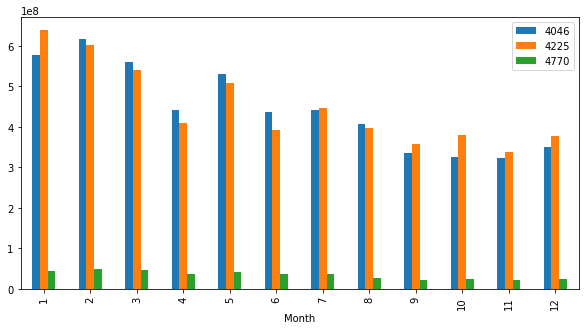

In [163]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='bar',figsize=(10,5))

> Avocaods with PLU Code 4770's consumption is slightly declined towards the end of the year.

> Avocados with PLU Code 4225's & 4046's consumption has declined towards the end of the year.

> Avocados with PLU Code 4770's are least consumed throughout the year whereas 4225 & 4046 are almost equally consumed.

> Avocados with PLU Code 4225 are more consumed in February and least consumed in October & November.

> Avocados with PLU Code 4225 are more consumed in January and least in November.

> Avocados with PLU Code 4770 consumption is almost constant till July and then declined constantly towards end of the Year.

<a id=section50304></a>
### Analysis of Avocado Varieties against Region

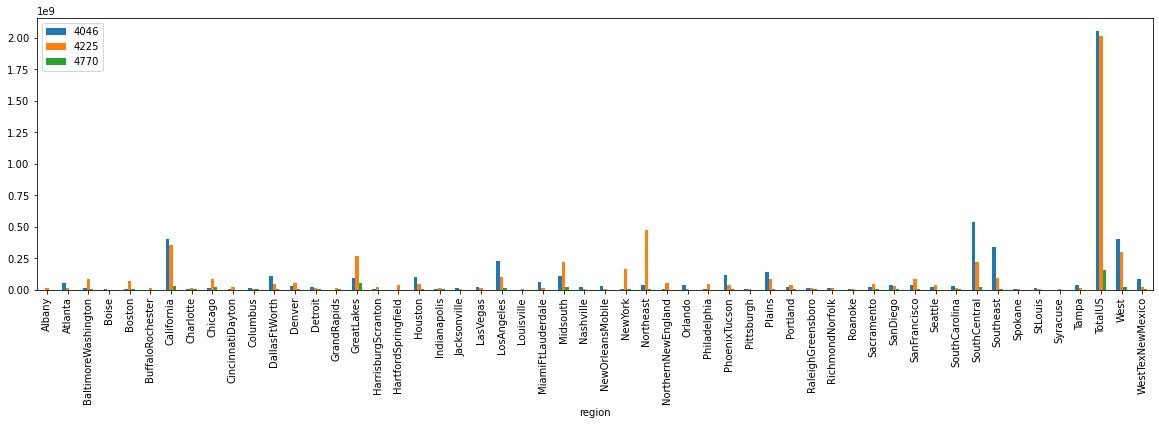

In [32]:
variant = df[['4046', '4225', '4770']].groupby(df.region).sum()
variant.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.show()

> Avocados with PLU Code 4046 are the highest consumed across regions.

> TotalUS has highest consumption of Avocados of which PLU Code 4046 are max consumed, followed by 4225 & 4770.

> Avocados of all 3 PLU Codes consumption is highest in TotalUS followed by SouthCentral, California,West & LosAngeles.

<a id=section50305></a>
### Analysis of Avocado Varieties against AveragePrice

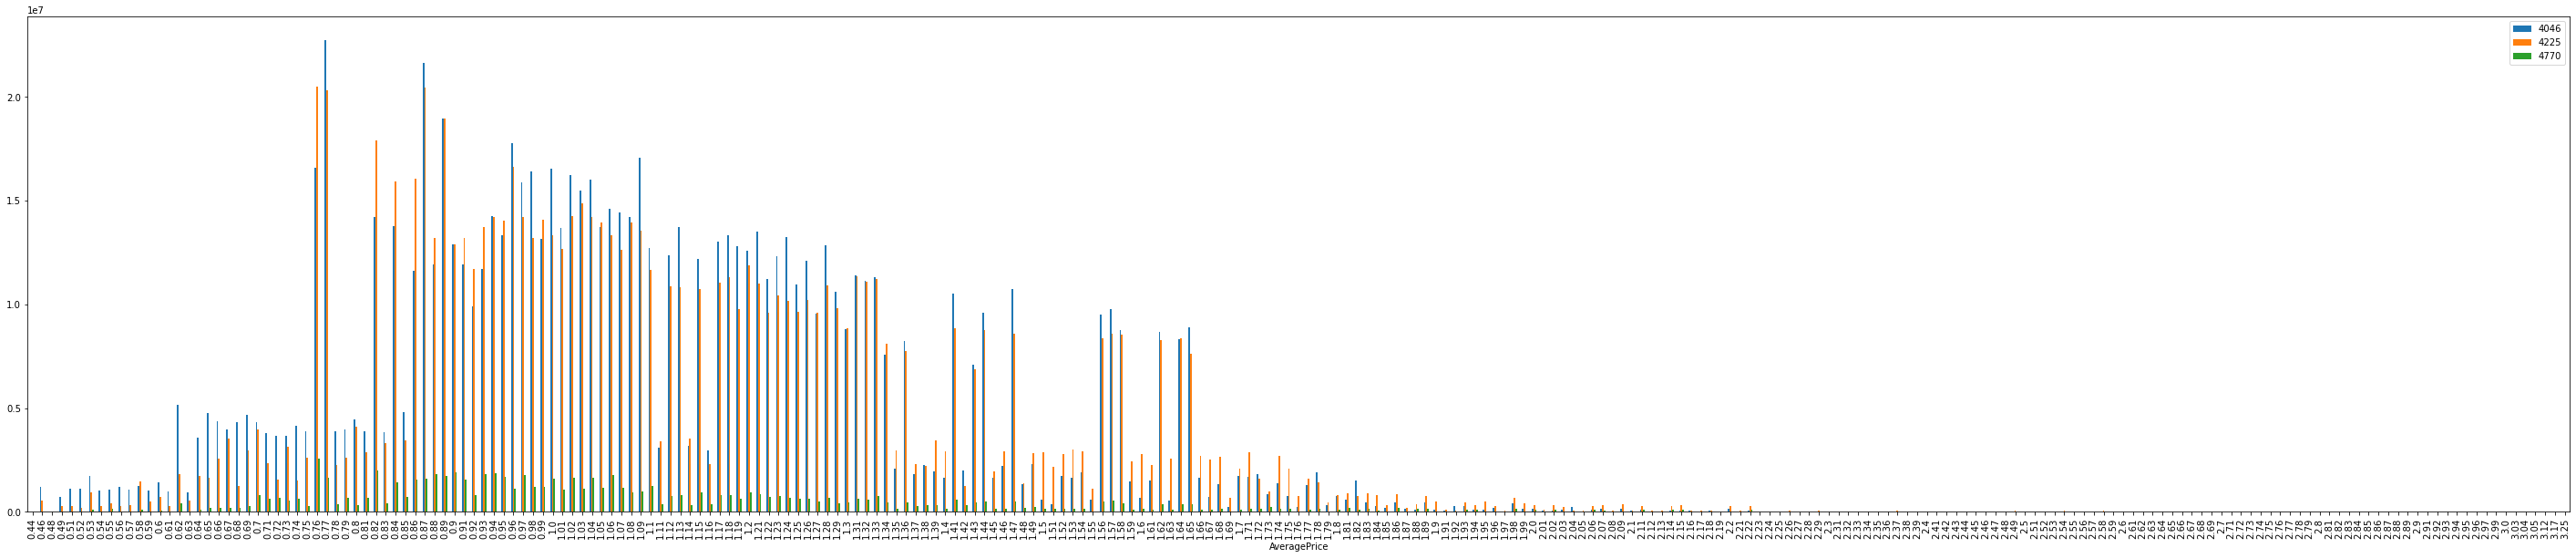

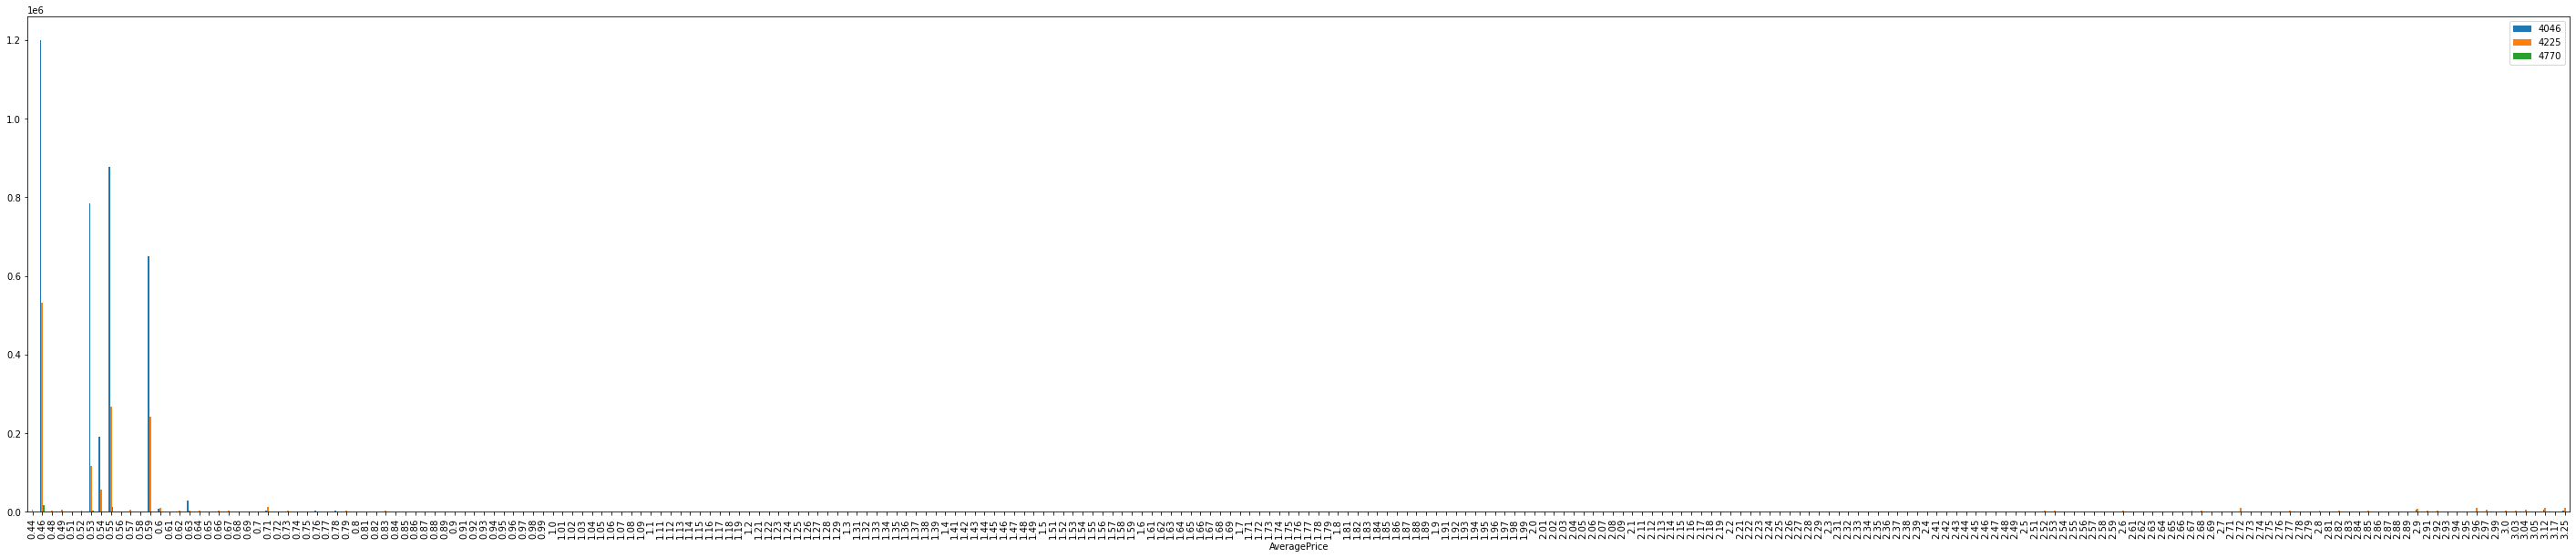

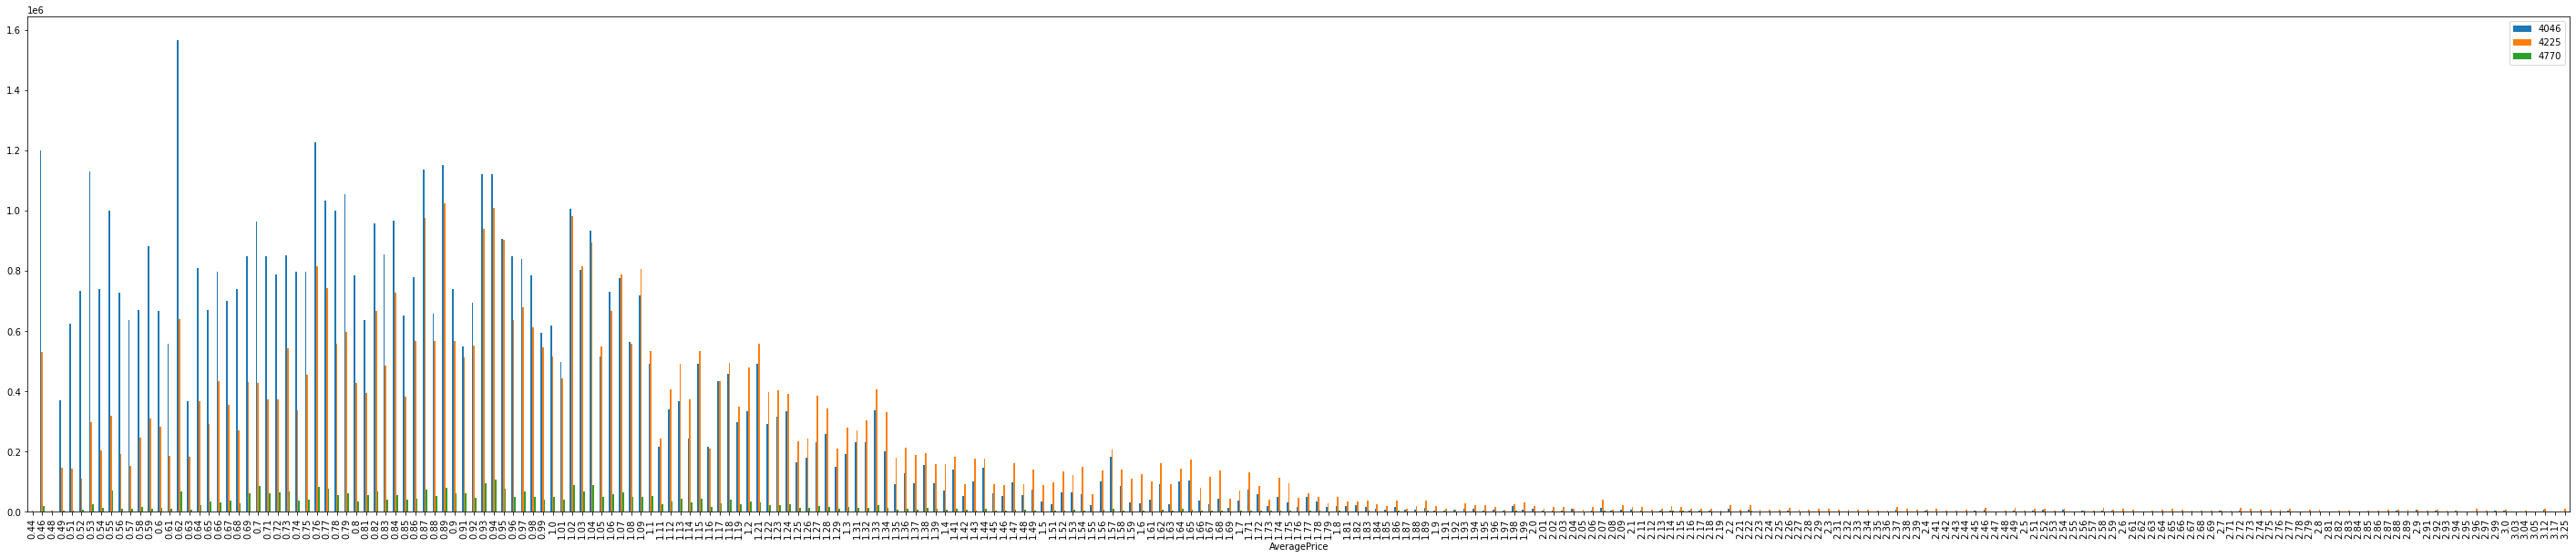

In [46]:
avgprice_max = df[['4046', '4225', '4770']].groupby(df.AveragePrice).max()
avgprice_min = df[['4046', '4225', '4770']].groupby(df.AveragePrice).min()
avgprice_mean = df[['4046', '4225', '4770']].groupby(df.AveragePrice).mean()
avgprice_max.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)
avgprice_min.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)
avgprice_mean.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(50,10)
plt.show()

> Avocados with LPU Code 4046 are highly sold when the Maximum AveragePrice is 0.77.

> Avocados with LPU Code 4046 are highly sold when the Minimum AveragePrice is 0.46.

> Avocados with LPU Code 4046 are highly sold when the Mean AveragePrice is 0.62.

> Avocados with LPU Code 4225 are highly sold when the AveragePrice is 0.87 & 0.76.

> Avocados are not sold when the AveragePrice crossed 2.22

<a id=section50306></a>
### Analysis of Avocado Varieties against Type

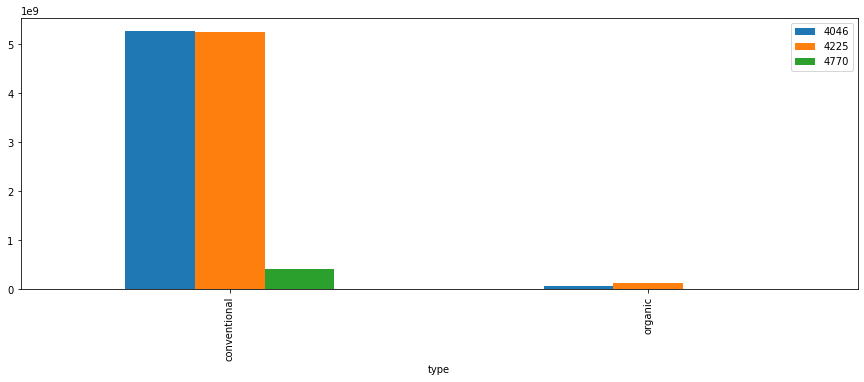

In [48]:
variant = df[['4046', '4225', '4770']].groupby(df.type).sum()
variant.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

> Conventional Avocados are highly sold of which 4046 are highly sold followed by 4225.

> Organic Avocados with LPU Coe 4770 are not sold at all.

<a id=section50307></a>
### Analysis of Total Volume Vs AveragePrice based on Year

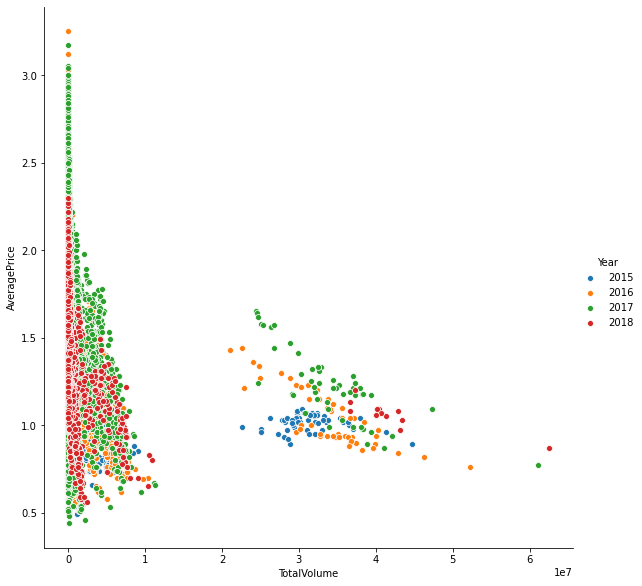

In [120]:
sns.pairplot(x_vars=['TotalVolume'], y_vars=['AveragePrice'], data=df, hue="Year", height=8)
plt.show()

> Average Price is highest in 2016 followed by 2017.

> TotalVolume is highest in 2018 followed by 2017.

In [ ]:
df['Month'] = df['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
                                   6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
                                   11: 'November', 12: 'December'})

<a id=section50308></a>
### Analysis of AveragePrice, Month & Year

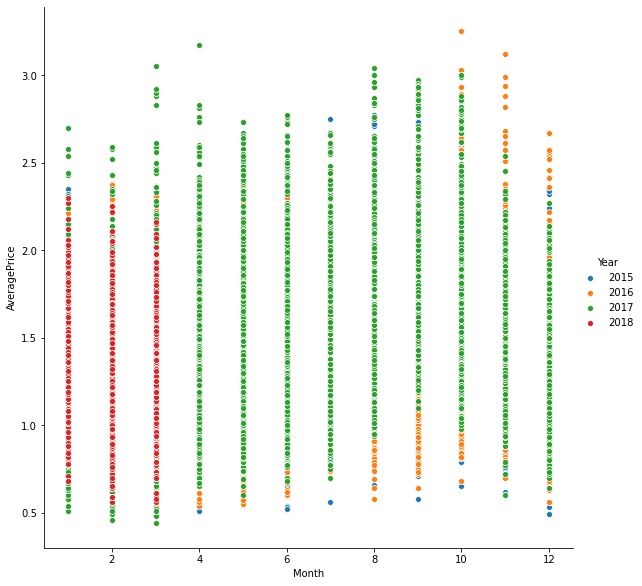

In [168]:
sns.pairplot(x_vars=['Month'], y_vars=['AveragePrice'], data=df, hue="Year", height=8)
plt.show()

> Average Price is highest in the Month of October 2016 and is least in March 2017.

<a id=section50309></a>
### Analysis of AveragePrice, Month & Type

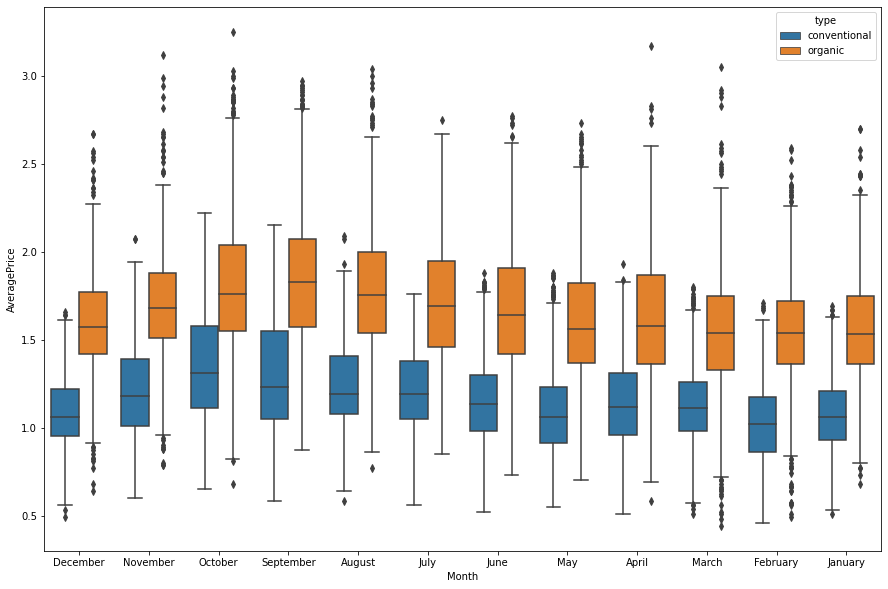

In [55]:
sns.boxplot(y="AveragePrice",x="Month",hue='type',data=df)
fig=plt.gcf()
fig.set_size_inches(15,10)

> Organic Avocados AveragePrice is high when compared to Conventional.

> Organic Avocaods AveragePrice is highest in October and Least in March.

> Organic Avocados AveragePrice range is highest in April.

> Conventional Avocados AveragePrice is highest in August and Least in December.

> Conventional Avocados AveragePrice range is highest in September.

> Dropping Region field as we don't need that for Linear Regression

> Dropping Date field as we've already created fields for Year, Day & Month

> Performing One-Hot Encoding to convert Type to numerical variable from Categorical so that it can participate in Linear Regression.

<a id=section504></a>
### Preprocessing for ML modelling

<a id=section50401></a>
#### Dropping Region & Date columns from Dataframe which aren't relevant for our Model Analysis

In [19]:
df.drop(['region','Date'],axis=1,inplace=True)

<a id=section50402></a>
#### Categorical Encoding based on Avocado Type 

In [20]:
df_final=pd.get_dummies(df)

<a id=section505></a>
### Correlation between numerical variables

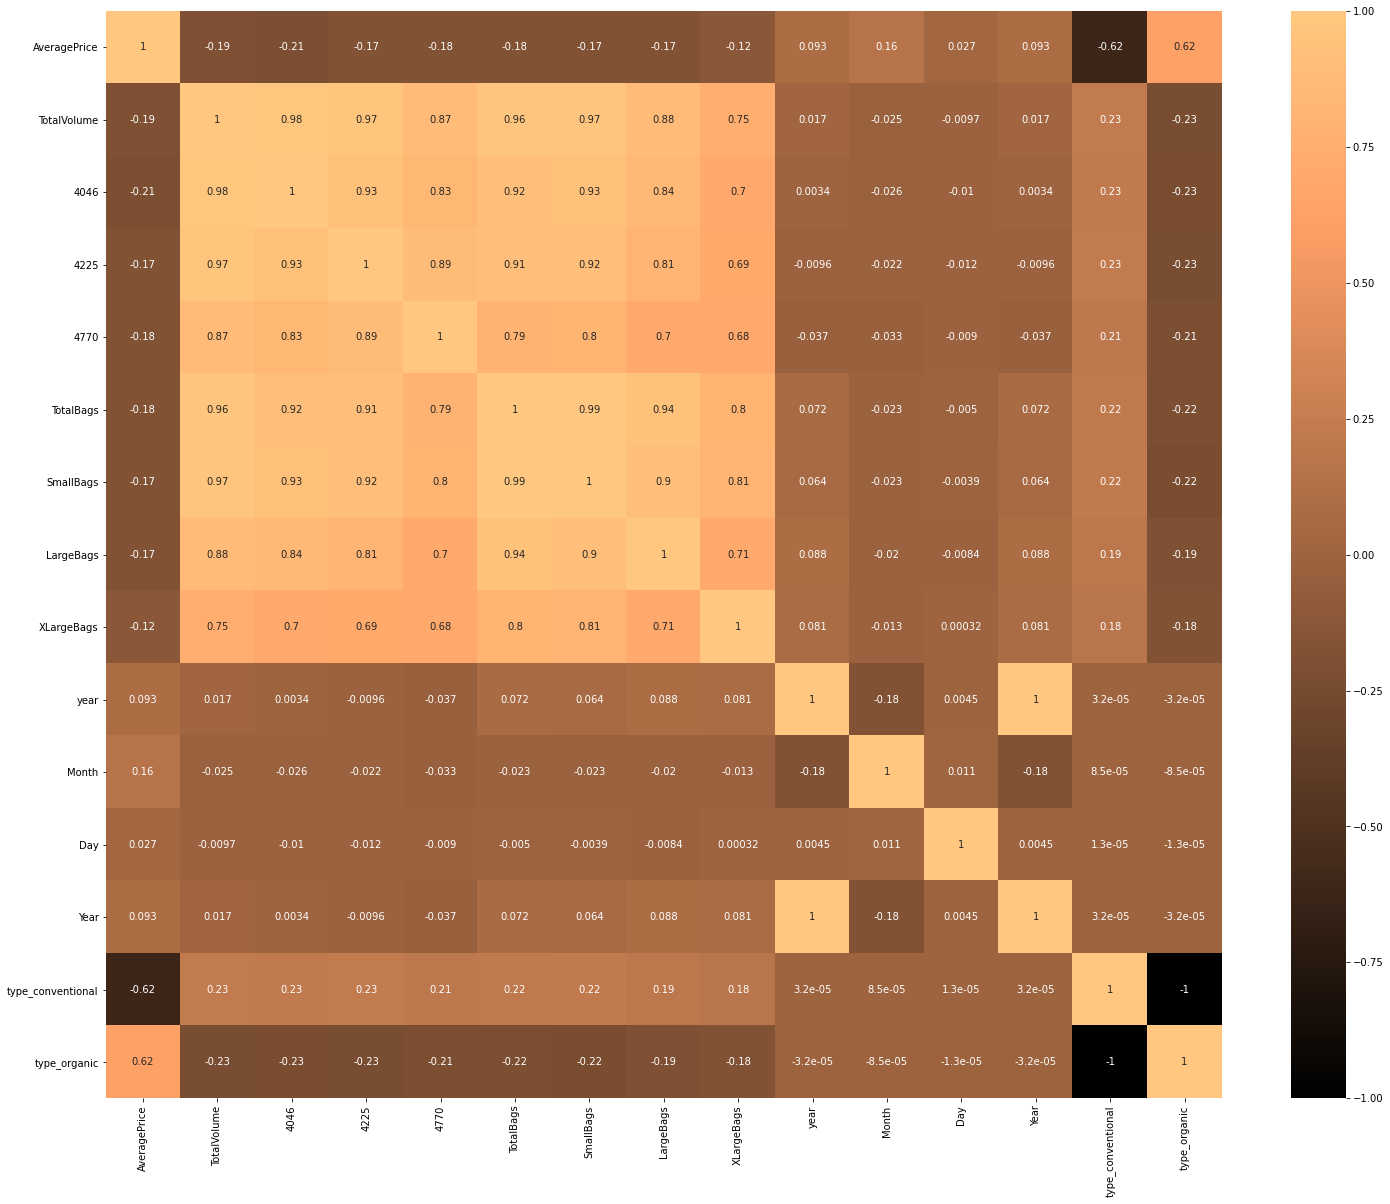

In [21]:
sns.heatmap(df_final.corr(),cmap='copper',annot=True)
fig=plt.gcf()
fig.set_size_inches(25,20)

> TotalBags sold is highly correlated with SmallBags sold.

> Avocados 4046 are highly correlated with TotalVolume.

> Avocados 4225 are highly correlated with TotalVolume.

> Conventional Avocados are least correlated with AveragePrice.

<a id=section6></a>
## Machine Learning Modelling

* Prepare Source & Target Features
* Import Train & Test split package from sklearn.model_selection library
* Split dataset for Train & Test, Test size would be 20% 

In [22]:
X=df_final.iloc[:,df_final.columns!='AveragePrice']
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<a id=section601></a>
### Regression Machine Learning Models

<a id=section60101></a>
#### Linear Regression Model

* Import Linear Regression package from sklearn.linear_model library
* Instantiate Linear Regression package
* Fit the train dataset
* Predict Linear Regression model output

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

<a id=section6010101></a>
##### Plot between Test data & Predicted Data for Linear Regression model

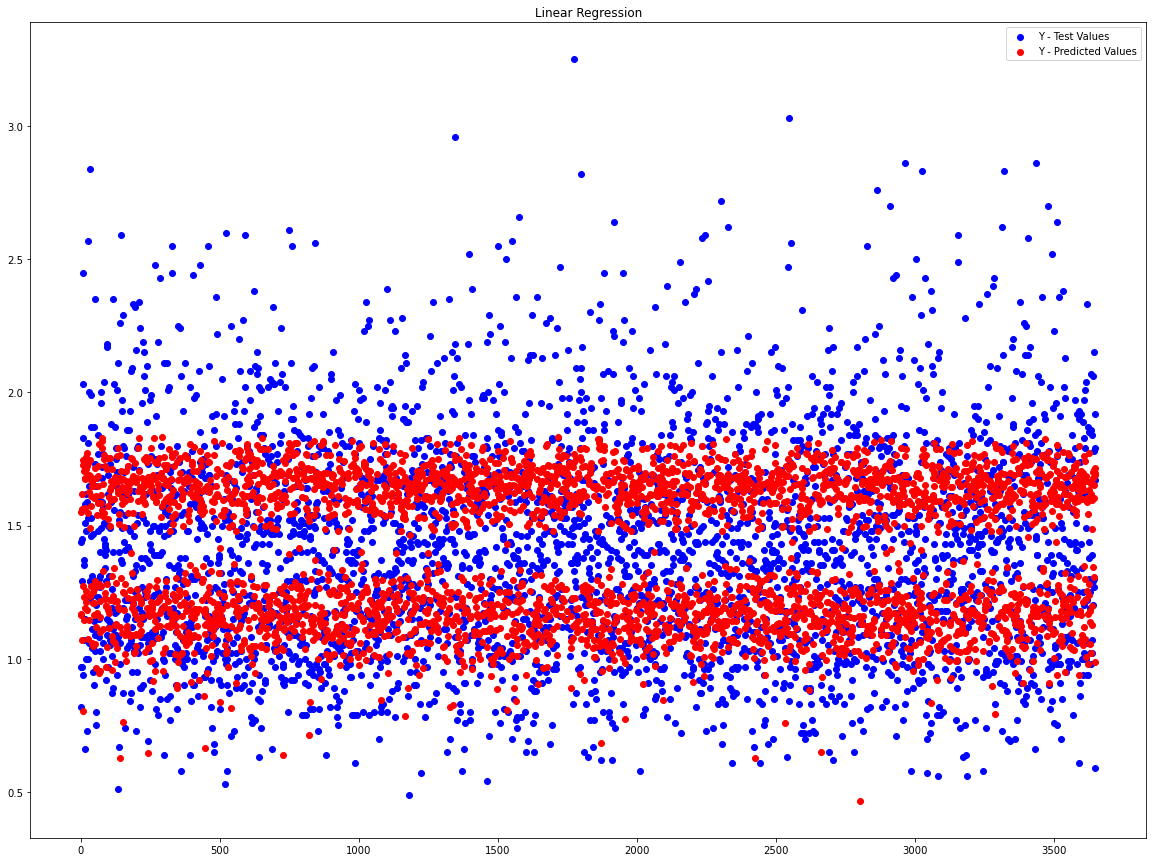

In [30]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=lr_pred,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Linear Regression')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

<a id=section60102></a>
#### Decision Tree Regression Model

* Import DecisionTreeRegressor package from sklearn.tree library
* Instantiate DecisionTreeRegressor package
* Fit the train dataset
* Predict DecisionTreeRegressor model output

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred=dtr.predict(X_test)

<a id=section6010201></a>
##### Plot between Test data & Predicted Data for Decision Tree Regression model

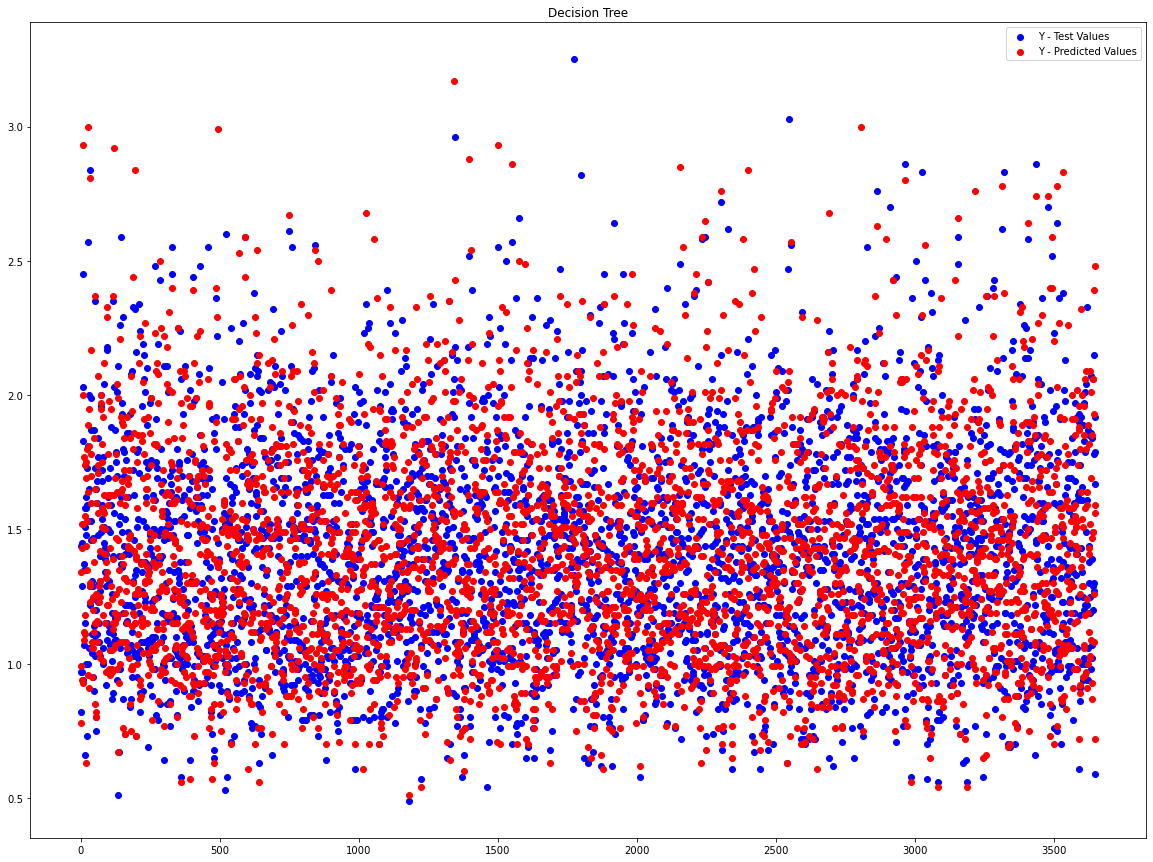

In [33]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=dtr_pred,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Decision Tree')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

<a id=section60103></a>
#### Random Forest Regression Model

* Import RandomForestRegressor package from sklearn.ensemble library
* Instantiate RandomForestRegressor package
* Fit the train dataset
* Predict RandomForestRegressor model output

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

<a id=section6010301></a>
##### Plot between Test data & Predicted Data for Random Forest Regression model

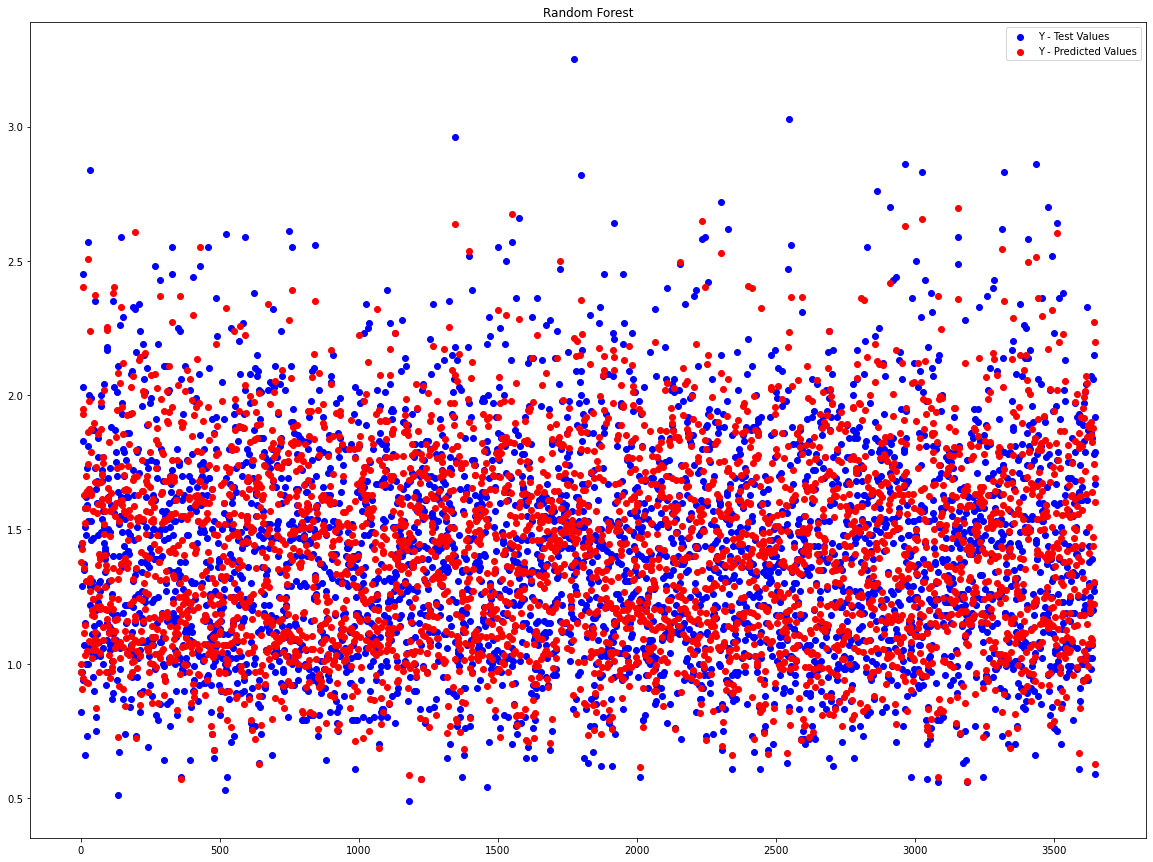

In [36]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=rfr_pred,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('Random Forest')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

<a id=section60104></a>
#### KNNeighbors Regression Model

* Import KNeighborsRegressor package from sklearn.neighbors library
* Instantiate KNeighborsRegressor package with 3 neighbors
* Fit the train dataset
* Predict KNeighborsRegressor model output

In [37]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=3)
KNR.fit(X_train,y_train)
KNR_pred=KNR.predict(X_test)

<a id=section6010401></a>
##### Plot between Test data & Predicted Data for KNN Regression model

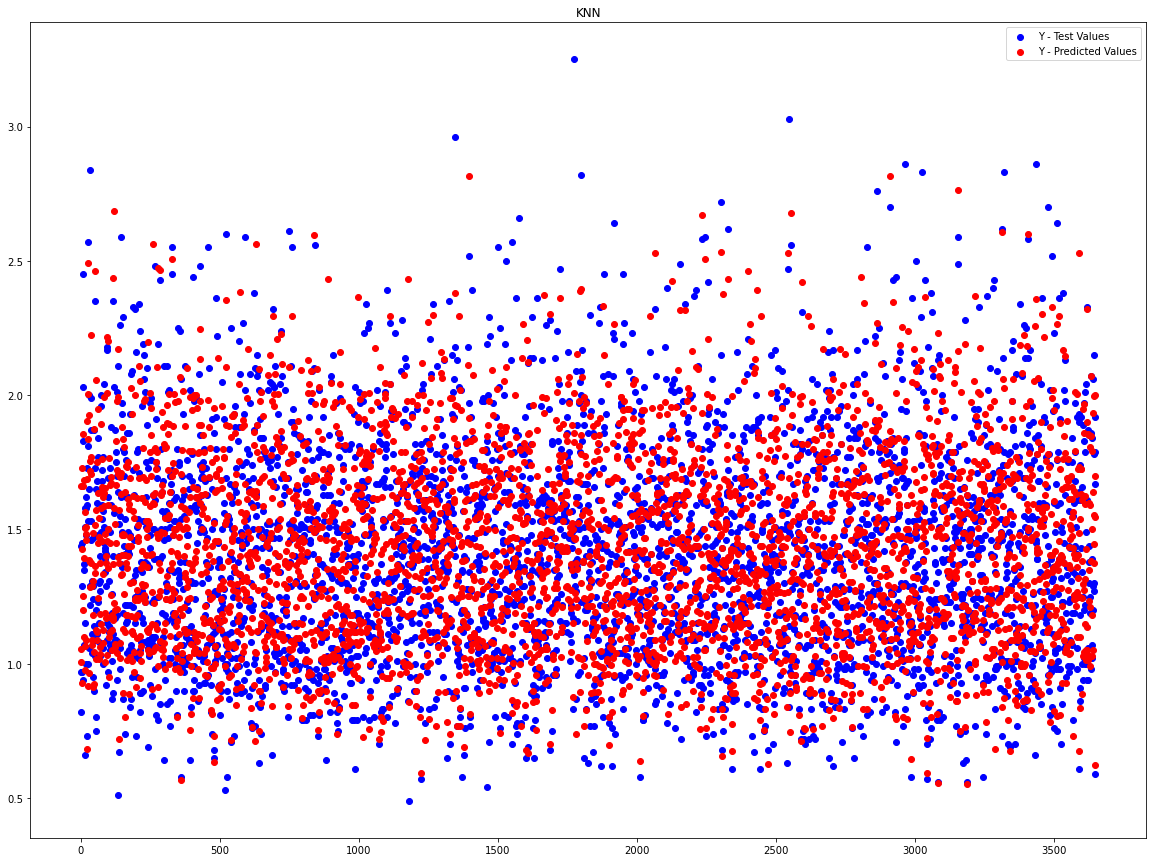

In [38]:
plt.scatter(y=y_test,x=np.arange(0,3650),color='blue',label='Y - Test Values')
plt.scatter(y=KNR_pred,x=np.arange(0,3650),color='red',label='Y - Predicted Values')
plt.title('KNN')
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(20,15)

In [99]:
pd.DataFrame({'Y Test':y_test , 'LR Pred':lr_pred,'DTR Pred':dtr_pred,'RF Pred':rfr_pred,'KNN Pred':KNR_pred},columns=['Y Test','LR Pred','DTR Pred','RF Pred','KNN Pred'])

,Y Test,LR Pred,DTR Pred,RF Pred,KNN Pred
8604,0.82,1.109118,1.08,0.9585,1.006667
2608,0.97,1.121900,0.96,1.0421,1.053333
14581,1.44,1.539817,1.37,1.3967,1.663333
4254,0.97,1.047442,0.94,0.9323,0.930000
16588,1.45,1.558201,1.43,1.4656,1.426667
...,...,...,...,...,...
15956,1.27,1.596873,1.21,1.2747,1.553333
12471,1.67,1.766403,1.53,1.6435,1.700000
4574,0.59,0.973456,0.72,0.6355,0.623333
16359,1.92,1.719480,1.82,1.7176,1.546667


<a id=section602></a>
### Plot Comparing Test & ML Models Predicted values 

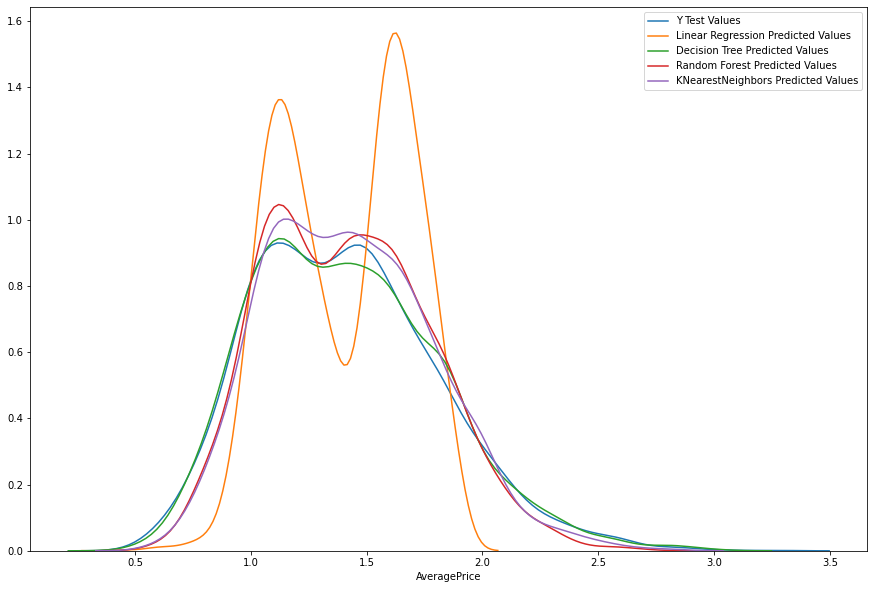

In [113]:
sns.distplot((y_test),bins=50,label='Y Test Values',hist=False)
sns.distplot((lr_pred),bins=50,label='Linear Regression Predicted Values',hist=False)
sns.distplot((dtr_pred),bins=50,label='Decision Tree Predicted Values',hist=False)
sns.distplot((rfr_pred),bins=50,label='Random Forest Predicted Values',hist=False)
sns.distplot((KNR_pred),bins=50,label='KNearestNeighbors Predicted Values',hist=False)
plt.legend(loc='upper right')
fig=plt.gcf()
fig.set_size_inches(15,10)

> From the above plot we can say that Decision Tree is quiet close to Test Values, followed by Random Forest & KNN.

<a id=section603></a>
### Plot Comparing ML Model Residuals

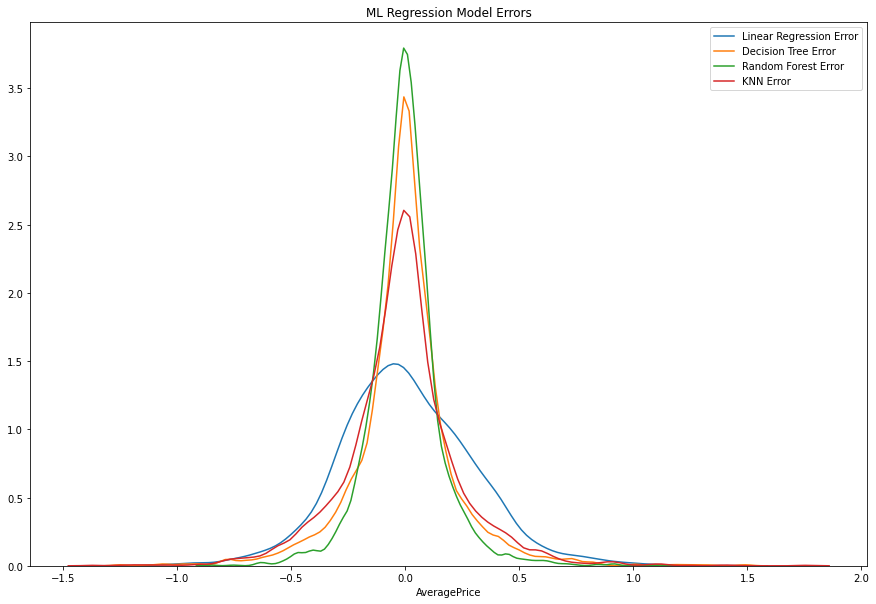

In [115]:
sns.distplot((y_test-lr_pred),bins=50,label='Linear Regression Error',hist=False)
sns.distplot((y_test-dtr_pred),bins=50,label='Decision Tree Error',hist=False)
sns.distplot((y_test-rfr_pred),bins=50,label='Random Forest Error',hist=False)
sns.distplot((y_test-KNR_pred),bins=50,label='KNN Error',hist=False)
plt.legend(loc='upper right')
plt.title("ML Regression Model Errors")
fig=plt.gcf()
fig.set_size_inches(15,10)

> From the above we can say that Random Forest has the highest variance with Test Value at the center i.e., it is distant from the Predicted value.

<a id=section604></a>
### Plot Comparing Test Values with ML Model Predictions

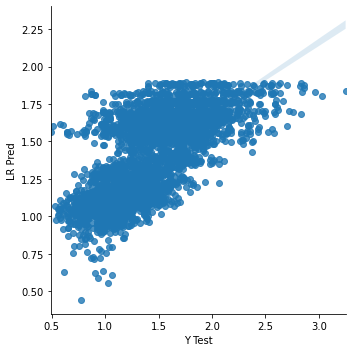

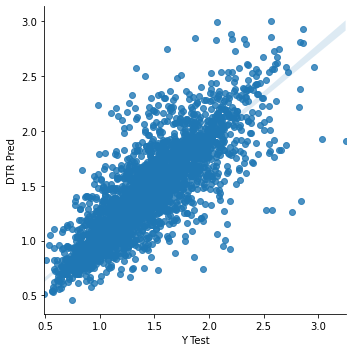

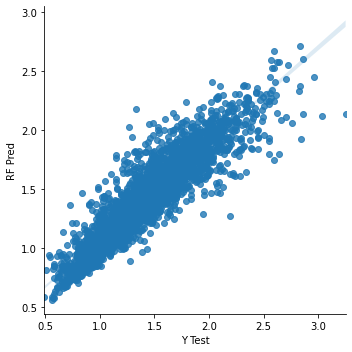

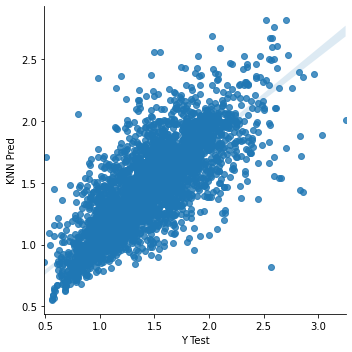

In [123]:
data = pd.DataFrame({'Y Test':y_test , 'LR Pred':lr_pred,'DTR Pred':dtr_pred,'RF Pred':rfr_pred,'KNN Pred':KNR_pred},columns=['Y Test','LR Pred','DTR Pred','RF Pred','KNN Pred'])
sns.lmplot(x='Y Test',y='LR Pred',data=data)
sns.lmplot(x='Y Test',y='DTR Pred',data=data)
sns.lmplot(x='Y Test',y='RF Pred',data=data)
sns.lmplot(x='Y Test',y='KNN Pred',data=data)

> From the above plot we can say that Predicted Values for Random Forest are linearly aligned when compared to other Regression Models.

<a id=section605></a>
### Model Evaluation Metrics

<a id=section60501></a>
##### Mean Absolute Error value across Algorithms

In [24]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [100]:
print('LR MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('DT MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('RF MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('KN MAE:', metrics.mean_absolute_error(y_test, KNR_pred))

LR MAE: 0.2265593640805938
DT MAE: 0.14813972602739728
RF MAE: 0.1082101917808219
KN MAE: 0.17409315068493153


. Prepping a list of MAE values calculated for different ML Models

In [101]:
MAE=[]
MAE.append(metrics.mean_absolute_error(y_test, lr_pred))
MAE.append(metrics.mean_absolute_error(y_test, dtr_pred))
MAE.append(metrics.mean_absolute_error(y_test, rfr_pred))
MAE.append(metrics.mean_absolute_error(y_test, KNR_pred))
print(MAE)

[0.2265593640805938, 0.14813972602739728, 0.1082101917808219, 0.17409315068493153]


<a id=section60502></a>
##### Mean Square Error value across Algorithms

In [102]:
print('LR MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('DT MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RF MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('KN MSE:', metrics.mean_squared_error(y_test, KNR_pred))

LR MSE: 0.08579062425013795
DT MSE: 0.05210572602739726
RF MSE: 0.02462492213150684
KN MSE: 0.06304063318112633


. Prepping a list of MSE values calculated for different ML Models

In [103]:
MSE=[]
MSE.append(metrics.mean_squared_error(y_test, lr_pred))
MSE.append(metrics.mean_squared_error(y_test, dtr_pred))
MSE.append(metrics.mean_squared_error(y_test, rfr_pred))
MSE.append(metrics.mean_squared_error(y_test, KNR_pred))
print(MSE)

[0.08579062425013795, 0.05210572602739726, 0.02462492213150684, 0.06304063318112633]


<a id=section60503></a>
##### Root Mean Square Error value across Algorithms

In [105]:
print('LR RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print('DT RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
print('RF RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('KN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, KNR_pred)))

LR RMSE: 0.2929003657391673
DT RMSE: 0.22826678695639727
RF RMSE: 0.15692330015490638
KN RMSE: 0.25107893814720167


. Prepping a list of RMSE values calculated for different ML Models

In [104]:
RMSE=[]
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, KNR_pred)))
print(RMSE)

[0.2929003657391673, 0.22826678695639727, 0.15692330015490638, 0.25107893814720167]


<a id=section60504></a>
##### Mean Absolute Percentage Error value across Algorithms

<a id=section6050401></a>
###### Custom Function to Calculate Mean Absolute Percentage Error

In [106]:
print('LR MAPE:', mean_absolute_percentage_error(y_test, lr_pred))
print('DT MAPE:', mean_absolute_percentage_error(y_test, dtr_pred))
print('RF MAPE:', mean_absolute_percentage_error(y_test, rfr_pred))
print('KN MAPE:', mean_absolute_percentage_error(y_test, KNR_pred))

LR MAPE: 17.153462646905123
DT MAPE: 10.734741051126964
RF MAPE: 7.883722703998444
KN MAPE: 12.803950181709586


. Prepping a list of MAPE values calculated for different ML Models

In [107]:
MAPE=[]
MAPE.append(mean_absolute_percentage_error(y_test, lr_pred))
MAPE.append(mean_absolute_percentage_error(y_test, dtr_pred))
MAPE.append(mean_absolute_percentage_error(y_test, rfr_pred))
MAPE.append(mean_absolute_percentage_error(y_test, KNR_pred))
print(MAPE)

[17.153462646905123, 10.734741051126964, 7.883722703998444, 12.803950181709586]


<a id=section60205></a>
##### R Square Error value across Algorithms

In [108]:
print('LR R2E:', metrics.r2_score(y_test, lr_pred))
print('DT R2E:', metrics.r2_score(y_test, dtr_pred))
print('RF R2E:', metrics.r2_score(y_test, rfr_pred))
print('KN R2E:', metrics.r2_score(y_test, KNR_pred))

LR R2E: 0.46604149050566446
DT R2E: 0.6756953798985266
RF R2E: 0.8467351551211924
KN R2E: 0.6076368155006258


. Prepping a list of R Square Error values calculated for different ML Models

In [109]:
R2E=[]
R2E.append(metrics.r2_score(y_test, lr_pred))
R2E.append(metrics.r2_score(y_test, dtr_pred))
R2E.append(metrics.r2_score(y_test, rfr_pred))
R2E.append(metrics.r2_score(y_test, KNR_pred))
print(R2E)

[0.46604149050566446, 0.6756953798985266, 0.8467351551211924, 0.6076368155006258]


##### Converting the Error Lists into a DataFrame

In [124]:
error_df = pd.DataFrame(R2E, index =['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'KNN Regressor'], 
                                              columns =['R^2E'])
error_df.head()

,R^2E
Linear Regression,0.466041
Decision Tree Regressor,0.675695
Random Forest Regressor,0.846735
KNN Regressor,0.607637


In [126]:
error_df['MAE']=MAE
error_df['MSE']=MSE
error_df['RMSE']=RMSE
error_df['MAPE']=MAPE
error_df['MAPE']=MAPE

<a id=section60506></a>
##### Dataframe showing ML Models & Evaluation Metrics against those Models

##### Error Dataframe showing ErrorScores between Test & Predicted Values for different Regression Machine Learning Models

In [127]:
error_df

,R^2E,MAE,MSE,RMSE,MAPE
Linear Regression,0.466041,0.226559,0.085791,0.292900,17.153463
Decision Tree Regressor,0.675695,0.148140,0.052106,0.228267,10.734741
Random Forest Regressor,0.846735,0.108210,0.024625,0.156923,7.883723
KNN Regressor,0.607637,0.174093,0.063041,0.251079,12.803950


<a id=section7></a>
### Conclusion

> For this Problem, we'll be considering RMSE as our Evaluation Metric and from which it is evident that Random Forest has least Error score. Even in Mean Absolute Error, Mean Square Error Evaluation Metrics, Random Forest has the least Error Score. Hence, we'll be considering Random Forest as our Model for predicting values for this problem.